## Explanation of what the code does

This code looks at data for enrollment, earnings after college and repayments after college, and compares them for three universities: University of Chicago, University of Alabama Birmingham (UAB) and University of California Berkeley (UCB).

It uses the Bokeh library to produce interactive visualizations.

The rationale behind choosing the above three universities was to allow a private vs public, elite vs non-elite, and a geographicaly diverse comparison.

In [145]:
import os
import pandas as pd
import numpy as np
import bokeh
from bokeh.plotting import figure, show
from bokeh.layouts import gridplot
from bokeh.io import output_notebook
from bokeh.models import Legend, LegendItem
from bokeh.models import HoverTool
output_notebook()
from bokeh.models.widgets import Panel, Tabs
import matplotlib.pyplot as plt
from bokeh.models import ColumnDataSource, FactorRange

Loading BokehJS ...

## Enrollment

In [146]:
def read_enrollment_data(path_for_UChicago, path_for_UAB, path_for_UCB):
    enrollment_rate_UChicago = pd.read_csv(path_for_UChicago + "EducationDataPortal_12.01.2019_sex.csv")
    enrollment_rate_UAB = pd.read_csv(path_for_UAB + "EducationDataPortal_12.01.2019_sex.csv")
    enrollment_rate_UCB = pd.read_csv(path_for_UCB + "EducationDataPortal_12.01.2019_sex.csv")
    
    enrollment_rate_UChicago['enrollment_rate_UChicago'] = enrollment_rate_UChicago['number_admitted']/enrollment_rate_UChicago['number_applied']
    
    enrollment_rate_UAB['enrollment_rate_UAB'] = enrollment_rate_UAB['number_admitted']/enrollment_rate_UAB['number_applied']
    enrollment_rate_UCB['enrollment_rate_UCB'] = enrollment_rate_UCB['number_admitted']/enrollment_rate_UCB['number_applied']
    
    return enrollment_rate_UChicago, enrollment_rate_UAB, enrollment_rate_UCB

In [147]:
def proportion_female_enrollment(enrollment_rate_UChicago, enrollment_rate_UAB, enrollment_rate_UCB):
    #the code in this function merges the two dataframes containing female and total number of enrollments respectively, and then divides the two 
    
    df_only_female_admitted_UChicago = enrollment_rate_UChicago[enrollment_rate_UChicago['sex'] == 'Female']
    df_only_female_admitted_UAB = enrollment_rate_UAB[enrollment_rate_UAB['sex'] == 'Female']
    df_only_female_admitted_UCB = enrollment_rate_UCB[enrollment_rate_UCB['sex'] == 'Female']

    df_only_total_admitted_UChicago = enrollment_rate_UChicago[enrollment_rate_UChicago['sex'] == 'Total']
    df_only_total_admitted_UAB = enrollment_rate_UAB[enrollment_rate_UAB['sex'] == 'Total']
    df_only_total_admitted_UCB = enrollment_rate_UCB[enrollment_rate_UCB['sex'] == 'Total']

    merged_total_and_female_admitted_UChicago = df_only_female_admitted_UChicago.merge(df_only_total_admitted_UChicago, 
                                                                                       on = 'year', how = 'left', 
                                                                                       suffixes = ('_female', '_total'))
    merged_total_and_female_admitted_UAB = df_only_female_admitted_UAB.merge(df_only_total_admitted_UAB, 
                                                                             on = 'year', how = 'left', 
                                                                             suffixes = ('_female', '_total'))
    merged_total_and_female_admitted_UCB = df_only_female_admitted_UCB.merge(df_only_total_admitted_UCB, 
                                                                             on = 'year', how = 'left', 
                                                                             suffixes = ('_female', '_total'))

    merged_total_and_female_admitted_UChicago['proportion_female_enrollment'] = merged_total_and_female_admitted_UChicago['number_admitted_female']/merged_total_and_female_admitted_UChicago['number_admitted_total']
    
    merged_total_and_female_admitted_UAB['proportion_female_enrollment'] = merged_total_and_female_admitted_UAB['number_admitted_female']/merged_total_and_female_admitted_UAB['number_admitted_total']
    
    merged_total_and_female_admitted_UCB['proportion_female_enrollment_UCB'] = merged_total_and_female_admitted_UCB['number_admitted_female']/merged_total_and_female_admitted_UCB['number_admitted_total']
    
    return merged_total_and_female_admitted_UChicago, merged_total_and_female_admitted_UAB, merged_total_and_female_admitted_UCB

In [148]:
# partially from assignment 1,2
def merge_enrollment_data(enrollment_rate_UChicago, enrollment_rate_UAB, enrollment_rate_UCB, merged_total_and_female_admitted_UChicago, merged_total_and_female_admitted_UAB, merged_total_and_female_admitted_UCB):

    df_only_total_rates_UChicago = enrollment_rate_UChicago[enrollment_rate_UChicago['sex'] == 'Total']
    df_only_total_rates_UAB = enrollment_rate_UAB[enrollment_rate_UAB['sex'] == 'Total']
    df_only_total_rates_UCB = enrollment_rate_UCB[enrollment_rate_UCB['sex'] == 'Total']

    merged_total_enrollment_rates = df_only_total_rates_UChicago.merge(df_only_total_rates_UAB, on='year', 
                                                                       how = 'left', suffixes = ('_UChicago', '_UAB')).merge(df_only_total_rates_UCB,on='year', how = 'left')
    
    merged_proportion_female_enrollment = merged_total_and_female_admitted_UChicago.merge(merged_total_and_female_admitted_UAB, on='year',
                                                                                          how = 'left', suffixes = ('_UChicago', '_UAB')).merge(merged_total_and_female_admitted_UCB,on='year', how = 'left')

    return merged_total_enrollment_rates, merged_proportion_female_enrollment   

In [149]:
# from assignments 1,2
def enrollment_graphs(merged_total_enrollment_rates, merged_proportion_female_enrollment):
    fig, ax = plt.subplots(2,1)
    merged_total_enrollment_rates.plot(kind='line',x='year',y='enrollment_rate_UChicago',ax=ax[0], color = 'red')
    merged_total_enrollment_rates.plot(kind='line',x='year',y='enrollment_rate_UAB',ax=ax[0], color = 'green')
    merged_total_enrollment_rates.plot(kind='line',x='year',y='enrollment_rate_UCB',ax=ax[0], color = 'blue')
    
    ax[0].set_ylabel("proportion")
    ax[0].legend(bbox_to_anchor=(1.04,1), loc="upper left")
    
    merged_proportion_female_enrollment.plot(kind='line',x='year',y='proportion_female_enrollment_UChicago',
                                              ax=ax[1], color = 'red')
    merged_proportion_female_enrollment.plot(kind='line',x='year',y='proportion_female_enrollment_UAB', 
                                             ax=ax[1], color = 'green')
    merged_proportion_female_enrollment.plot(kind='line',x='year',y='proportion_female_enrollment_UCB', 
                                             ax=ax[1], color = 'blue')
    
    ax[1].set_ylabel("proportion")
    ax[1].legend(bbox_to_anchor=(1.04,1), loc="upper left")
    
    plt.suptitle('Enrollment Characteristics')
    plt.show()

## Repayments

In [150]:
def read_repayment_data(path_for_UChicago, path_for_UAB, path_for_UCB):
    repayment_rate_UChicago = pd.read_csv(path_for_UChicago + "EducationDataPortal_12.02.2019_years_since_entering_repay.csv")
    repayment_rate_UAB = pd.read_csv(path_for_UAB + "EducationDataPortal_12.01.2019_years_since_entering_repay.csv")
    repayment_rate_UCB = pd.read_csv(path_for_UCB + "EducationDataPortal_12.01.2019_years_since_entering_repay.csv")

    return repayment_rate_UChicago, repayment_rate_UAB, repayment_rate_UCB

In [151]:
def repayments_graphs(repayment_rate_UChicago, repayment_rate_UAB, repayment_rate_UCB):
    repayment_rate_UChicago_after_5years = repayment_rate_UChicago[repayment_rate_UChicago['years_since_entering_repay'] == 5]
    repayment_rate_UAB_after_5years = repayment_rate_UAB[repayment_rate_UAB['years_since_entering_repay'] == 5]
    repayment_rate_UCB_after_5years = repayment_rate_UCB[repayment_rate_UCB['years_since_entering_repay'] == 5]

    # each of the three plots below has two lines: one for low income students and the other for high income students
    
    plot_UChicago = figure(title='UChicago repayment rate', x_axis_label='Year', y_axis_label='Repayment rates', 
                           plot_height=300)
    plot_UChicago.line(repayment_rate_UChicago_after_5years['year'], 
                       repayment_rate_UChicago_after_5years['repay_rate_lowincome'], color = 'green', 
                       legend = "low income households")
    plot_UChicago.line(repayment_rate_UChicago_after_5years['year'], 
                       repayment_rate_UChicago_after_5years['repay_rate_highincome'], color = 'blue', 
                       legend = "high income households")

    plot_UAB = figure(title='Uni of Alabama repayment rate', x_axis_label='Year', y_axis_label='Repayment rates', 
                      plot_height=300)
    plot_UAB.line(repayment_rate_UAB_after_5years['year'], repayment_rate_UAB_after_5years['repay_rate_lowincome'], 
                  color = 'green', legend = "low income households")
    plot_UAB.line(repayment_rate_UAB_after_5years['year'], repayment_rate_UAB_after_5years['repay_rate_highincome'], 
                  color = 'blue', legend = "high income households")

    plot_UCB = figure(title='Uni of Alabama repayment rate', x_axis_label='Year', y_axis_label='Repayment rates', 
                      plot_height=300)
    plot_UCB.line(repayment_rate_UCB_after_5years['year'], repayment_rate_UCB_after_5years['repay_rate_lowincome'], 
                  color = 'green', legend = "low income households")
    plot_UCB.line(repayment_rate_UCB_after_5years['year'], repayment_rate_UCB_after_5years['repay_rate_highincome'], 
                  color = 'blue', legend = "high income households")

    plot_repayment = gridplot([[plot_UChicago, plot_UAB], [plot_UCB]])
    
    repayments_panel = Panel(child = plot_repayment, title = 'Loan repayment rate by family income')

    return repayments_panel

## Earnings part

In [152]:
def read_earnings_data(path_for_UChicago, path_for_UAB, path_for_UCB):
    earnings_rate_UChicago = pd.read_csv(path_for_UChicago + "EducationDataPortal_12.02.2019_years_after_entry.csv")
    earnings_rate_UAB = pd.read_csv(path_for_UAB + "EducationDataPortal_12.01.2019_years_after_entry.csv")
    earnings_rate_UCB = pd.read_csv(path_for_UCB + "EducationDataPortal_12.01.2019_years_after_entry.csv")
    
    return earnings_rate_UChicago, earnings_rate_UAB, earnings_rate_UCB

In [153]:
def calculation_on_earnings_data(earnings_rate_UChicago, earnings_rate_UAB, earnings_rate_UCB):
    # the code in this function finds absolute and percentage change in earnings for earners at 90 percentile and 
    # 25 percentile, for each of the three colleges
    
    # the change has been calculated by taking the difference in earnings for the years 2011 and 2005, when the students
    # were 8 years out of college
    
    # for each college, row 11 corresponds to earnings in 2011, and row 25 corresponds earnings in 2005
    
    abs_change_90pct_UChicago = earnings_rate_UChicago['earnings_pct90'].iloc[11] - earnings_rate_UChicago['earnings_pct90'].iloc[25]
    abs_change_25pct_UChicago = earnings_rate_UChicago['earnings_pct25'].iloc[11] - earnings_rate_UChicago['earnings_pct25'].iloc[25]
    
    percent_change_90pct_UChicago = abs_change_90pct_UChicago/earnings_rate_UChicago['earnings_pct90'].iloc[25]
    percent_change_25pct_UChicago = abs_change_25pct_UChicago/earnings_rate_UChicago['earnings_pct25'].iloc[25]

    abs_change_90pct_UAB = earnings_rate_UAB['earnings_pct90'].iloc[11] - earnings_rate_UAB['earnings_pct90'].iloc[25]
    abs_change_25pct_UAB = earnings_rate_UAB['earnings_pct25'].iloc[11] - earnings_rate_UAB['earnings_pct25'].iloc[25]

    percent_change_90pct_UAB = abs_change_90pct_UAB/earnings_rate_UAB['earnings_pct90'].iloc[25]
    percent_change_25pct_UAB = abs_change_25pct_UAB/earnings_rate_UAB['earnings_pct25'].iloc[25]


    abs_change_90pct_UCB = earnings_rate_UCB['earnings_pct90'].iloc[11] - earnings_rate_UCB['earnings_pct90'].iloc[25]
    abs_change_25pct_UCB = earnings_rate_UCB['earnings_pct25'].iloc[11] - earnings_rate_UCB['earnings_pct25'].iloc[25]

    percent_change_90pct_UCB = abs_change_90pct_UCB/earnings_rate_UCB['earnings_pct90'].iloc[25]
    percent_change_25pct_UCB = abs_change_25pct_UCB/earnings_rate_UCB['earnings_pct25'].iloc[25]
    
    return abs_change_90pct_UChicago, abs_change_25pct_UChicago, percent_change_90pct_UChicago, percent_change_25pct_UChicago, abs_change_90pct_UAB, abs_change_25pct_UAB, percent_change_90pct_UAB, percent_change_25pct_UAB, abs_change_90pct_UCB, abs_change_25pct_UCB,percent_change_90pct_UCB, percent_change_25pct_UCB  

In [154]:
def earnings_graphs(abs_change_90pct_UChicago, abs_change_25pct_UChicago, percent_change_90pct_UChicago, 
                    percent_change_25pct_UChicago, abs_change_90pct_UAB, abs_change_25pct_UAB, percent_change_90pct_UAB, 
                    percent_change_25pct_UAB, abs_change_90pct_UCB, abs_change_25pct_UCB,percent_change_90pct_UCB, 
                    percent_change_25pct_UCB):
    
    # the graphs below are referred from: https://datascience.stackexchange.com/questions/10322/how-to-plot-multiple-variables-with-pandas-and-bokeh
    # one graph plots the absolute change earnings (p_absolute) and the other plots the percentage change (p_percent)
    
    universities = ["UChicago", "UAB", "UCB"]
    absolute_changes = ['abs_change_for_90pct_earners', 'abs_change_for_25pct_earners']
    

    data_absolute = {'absolute_changes' : absolute_changes,
          'values'   : [abs_change_90pct_UChicago, abs_change_90pct_UAB, abs_change_90pct_UCB, abs_change_25pct_UChicago,
                        abs_change_25pct_UAB, abs_change_25pct_UCB]}


    x = [(change, uni) for change in absolute_changes for uni in universities]
    counts = sum(zip(data_absolute['values']), ())

    source_absolute = ColumnDataSource(data=dict(x=x, counts=counts))

    p_absolute = figure(x_range= FactorRange(*x), plot_height=250, plot_width = 500, title="Absolute change in earnings",
           toolbar_location=None, tools="hover", tooltips = "$@counts")

    p_absolute.vbar(x='x', top='counts', width=0.9, source=source_absolute)
    
    
    percentage_changes = ['percent_change_for_90pct_earners', 'percent_change_for_25pct_earners']
    data_percentage = {'percentage_changes' : percentage_changes,
        'values'   : [percent_change_90pct_UChicago*100, percent_change_90pct_UAB*100, percent_change_90pct_UCB*100, 
                      percent_change_25pct_UChicago*100, percent_change_25pct_UAB*100, percent_change_25pct_UCB*100]}

    x = [(change, uni) for change in percentage_changes for uni in universities]
    counts = sum(zip(data_percentage['values']), ())

    source_percent = ColumnDataSource(data=dict(x= x, counts=counts))

    p_percent = figure(x_range= FactorRange(*x), plot_height=250, plot_width = 500, title="Percentage change in earnings",
           toolbar_location=None, tools="hover", tooltips = "@counts%")

    p_percent.vbar(x='x', top='counts', width=0.9, source=source_percent)
    
    plot_earnings = gridplot([[p_absolute, p_percent]])
    earnings_panel = Panel(child = plot_earnings, title = 'Change in earnings')
    
    return earnings_panel

In [155]:
def tab_repayment_and_earnings(earnings_panel, repayments_panel):
    
    tabs = Tabs(tabs=[earnings_panel, repayments_panel])
    show(tabs)

In [156]:
def main():
    path_for_UChicago = "C:\\Users\\adminuser\\Documents\\GitHub\\assignment-6-KsinghP\\UChicago\\"
    path_for_UAB = "C:\\Users\\adminuser\\Documents\\GitHub\\assignment-6-KsinghP\\UAlabama\\"
    path_for_UCB = "C:\\Users\\adminuser\\Documents\\GitHub\\assignment-6-KsinghP\\UCB\\"
    
    #enrollment portiom
    enrollment_rate_UChicago, enrollment_rate_UAB, enrollment_rate_UCB = read_enrollment_data(path_for_UChicago, 
                                                                                              path_for_UAB, path_for_UCB)
    
    merged_total_and_female_admitted_UChicago, merged_total_and_female_admitted_UAB, merged_total_and_female_admitted_UCB = proportion_female_enrollment(enrollment_rate_UChicago, enrollment_rate_UAB, enrollment_rate_UCB)
    
    merged_total_enrollment_rates, merged_proportion_female_enrollment = merge_enrollment_data(enrollment_rate_UChicago, enrollment_rate_UAB, enrollment_rate_UCB, 
                          merged_total_and_female_admitted_UChicago, merged_total_and_female_admitted_UAB, 
                          merged_total_and_female_admitted_UCB)
    
    enrollment_graphs(merged_total_enrollment_rates, merged_proportion_female_enrollment)
    
    #repayments portion
    repayment_rate_UChicago, repayment_rate_UAB, repayment_rate_UCB = read_repayment_data(path_for_UChicago, 
                                                                                          path_for_UAB, path_for_UCB)
    
    repayments_panel = repayments_graphs(repayment_rate_UChicago, repayment_rate_UAB, repayment_rate_UCB)
    
    #earnings portion
    earnings_rate_UChicago, earnings_rate_UAB, earnings_rate_UCB = read_earnings_data(path_for_UChicago, 
                                                                                      path_for_UAB, path_for_UCB)
    
    abs_change_90pct_UChicago, abs_change_25pct_UChicago, percent_change_90pct_UChicago, percent_change_25pct_UChicago, abs_change_90pct_UAB, abs_change_25pct_UAB, percent_change_90pct_UAB, percent_change_25pct_UAB, abs_change_90pct_UCB, abs_change_25pct_UCB,percent_change_90pct_UCB, percent_change_25pct_UCB = calculation_on_earnings_data(earnings_rate_UChicago, earnings_rate_UAB, earnings_rate_UCB)
    
    earnings_panel = earnings_graphs(abs_change_90pct_UChicago, abs_change_25pct_UChicago, percent_change_90pct_UChicago, percent_change_25pct_UChicago, abs_change_90pct_UAB,
                                     abs_change_25pct_UAB, percent_change_90pct_UAB, percent_change_25pct_UAB, 
                                     abs_change_90pct_UCB, abs_change_25pct_UCB,percent_change_90pct_UCB, 
                                     percent_change_25pct_UCB)
    
    #bokeh tab
    tab_repayment_and_earnings(earnings_panel, repayments_panel)

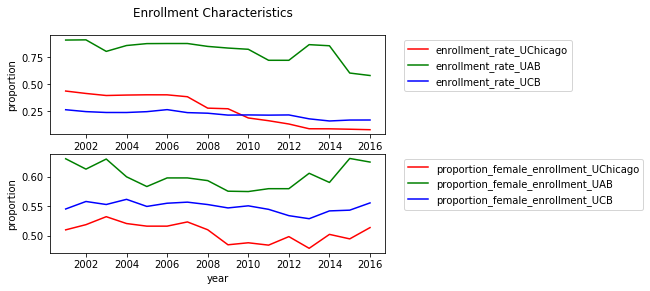

In [157]:
main()